In [2]:
# dependencies
from citipy import citipy
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
import scipy.stats as sts
from pprint import pprint
import numpy as np
import os
from random import uniform 
from api_keys_homework import api_key_weather


In [2]:
# use a uniform probability distribution to generate lat and lon coordinates based on their complete ranges  
# pass coordinates to citipy to populate an object with city names accompanied by their country codes based on their proximity to lat and lon coordinates
# store city names and country codes in a set object ensuring:
    # there are no duplicates already contained in the object
    # the api open weather map has a record of the city's weather (status code: 200)
    # there are no key errors or index errors during the data retrieval process 

cities = set() 
url = "http://api.openweathermap.org/data/2.5/weather?"

while len(cities) < 750:
    latitude = round(uniform(-90, 90), 3)
    longitude = round(uniform(-180, 180), 3)

    city = citipy.nearest_city(latitude, longitude)
    city_name = city.city_name
    country_code = city.country_code

    name_cc = f'{city_name},{country_code}'
    if name_cc not in cities: 
        query_url = f"{url}&appid={api_key_weather}&q={name_cc}"
        weather_request = requests.get(query_url)
        weather_json = weather_request.json()
        if weather_json['cod'] == 200:
            try: 
                cities.add(name_cc)
            except (KeyError, IndexError):
                pass

In [3]:
# create a dataframe city_weather_df with a column containing a retrieval index.  
# create a second and third column that splits the retrieval index into city and country columns  

retrieval_index = [str(i) for i in cities]
city_weather_df = pd.DataFrame({'retrieval index': retrieval_index})
city_weather_df['City'] = city_weather_df['retrieval index'].str.split(',').str[0]
city_weather_df['Country Code'] = city_weather_df['retrieval index'].str.split(',').str[1]
city_weather_df

,retrieval index,City,Country Code
0,"kristiansund,no",kristiansund,no
1,"pisco,pe",pisco,pe
2,"port-gentil,ga",port-gentil,ga
3,"kawalu,id",kawalu,id
4,"jipijapa,ec",jipijapa,ec
...,...,...,...
745,"la ronge,ca",la ronge,ca
746,"goderich,ca",goderich,ca
747,"cherskiy,ru",cherskiy,ru
748,"cao bang,vn",cao bang,vn


In [4]:
# iterate through city_weather_df using the retrieval index as a reference to retrieve information from API open weather about the weather in each city
        # passing city and country code together to the API will ensure the correct information is stored in each row
        # pass the information retrived to new columns in the main dataframe

print("Begining Data Retrieval")
print("-----------------------------")
for index, row in city_weather_df.iterrows():
        r_ind = row['retrieval index']
        query_url2 = f"{url}&appid={api_key_weather}&units=imperial&q={r_ind}"
        w_request = requests.get(query_url2).json()
        try:
                print(f'processing record {index} | {r_ind}')
                city_weather_df.loc[index, "Latitude"] = w_request["coord"]["lat"]
                city_weather_df.loc[index, "Longitude"] = w_request["coord"]["lon"]
                city_weather_df.loc[index, "Max Temperature (F)"] = w_request["main"]["temp_max"]
                city_weather_df.loc[index, "Humidity (%)"] = w_request["main"]["humidity"]
                city_weather_df.loc[index, "Cloudiness (%)"] = w_request["clouds"]["all"]
                city_weather_df.loc[index, "Wind Speed(mph)"] = w_request["wind"]["speed"]
                city_weather_df.loc[index, "Date"] = w_request["dt"]
        except (KeyError, IndexError):
                print(f'{index} | {r_ind} not found in data retrieval')
                pass

Begining Data Retrieval
-----------------------------
processing record 0 | kristiansund,no
processing record 1 | pisco,pe
processing record 2 | port-gentil,ga
processing record 3 | kawalu,id
processing record 4 | jipijapa,ec
processing record 5 | tateyama,jp
processing record 6 | new norfolk,au
processing record 7 | bambous virieux,mu
processing record 8 | kodiak,us
processing record 9 | tromso,no
processing record 10 | imphal,in
processing record 11 | voh,nc
processing record 12 | asfi,ma
processing record 13 | kisiwani,tz
processing record 14 | coihaique,cl
processing record 15 | penzance,gb
processing record 16 | price,us
processing record 17 | senneterre,ca
processing record 18 | atambua,id
processing record 19 | doha,qa
processing record 20 | aksu,cn
processing record 21 | porto novo,cv
processing record 22 | cowra,au
processing record 23 | raudeberg,no
processing record 24 | banjarmasin,id
processing record 25 | dakar,sn
processing record 26 | trelew,ar
processing record 27 | po

In [5]:
# clean dataframe and set columns to the appropriate datatypes

city_weather_df["City"] = city_weather_df["City"].str.title()
city_weather_df["Country Code"] = city_weather_df["Country Code"].str.upper()
city_weather_df["Date"] = pd.to_datetime(city_weather_df["Date"], unit='s')
city_weather_df.dtypes

retrieval index                object
City                           object
Country Code                   object
Latitude                      float64
Longitude                     float64
Max Temperature (F)           float64
Humidity (%)                  float64
Cloudiness (%)                float64
Wind Speed(mph)               float64
Date                   datetime64[ns]
dtype: object

In [20]:
# save city_weather_df as csv
city_weather_df.to_csv("../output_data/cityweather.csv", encoding="utf-8", index=False)


In [3]:
# read from new csv
file_path = "../output_data/cityweather.csv"
city_weather = pd.read_csv(file_path)

city_weather.head()

,retrieval index,City,Country Code,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed(mph),Date
0,"kristiansund,no",Kristiansund,NO,63.1115,7.7320,55.45,87.0,75.0,10.36,2022-06-23 01:13:27
1,"pisco,pe",Pisco,PE,-13.7000,-76.2167,62.65,77.0,100.0,10.36,2022-06-23 01:13:27
2,"port-gentil,ga",Port-Gentil,GA,-0.7193,8.7815,72.09,79.0,100.0,12.84,2022-06-23 01:13:27
3,"kawalu,id",Kawalu,ID,-7.3817,108.2082,75.42,90.0,99.0,0.85,2022-06-23 01:13:27
4,"jipijapa,ec",Jipijapa,EC,-1.3333,-80.5833,67.50,86.0,99.0,5.55,2022-06-23 01:13:28


In [4]:
# create summary statistics

stats_cw = round(city_weather.describe(), 2)
stats_cw

,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed(mph)
count,750.00,750.00,750.00,750.00,750.00,750.00
mean,21.37,22.81,67.49,71.15,57.46,8.00
std,33.16,88.77,13.80,19.92,42.45,5.41
min,-54.80,-179.17,25.41,1.00,0.00,0.00
25%,-5.59,-56.10,57.76,60.00,7.00,3.94
50%,24.58,25.88,69.57,75.00,75.00,6.54
75%,50.37,103.25,78.48,87.00,100.00,11.04
max,78.22,179.32,106.21,100.00,100.00,29.59


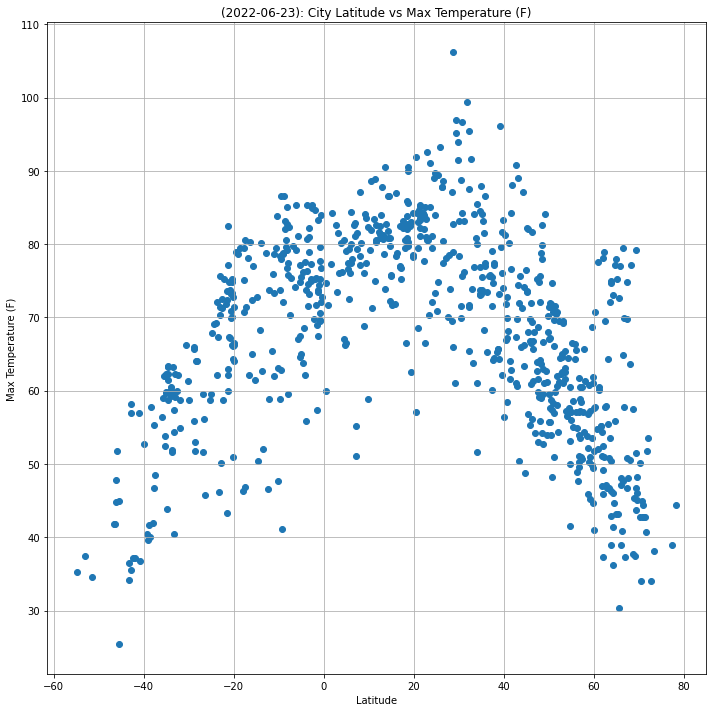

In [5]:
# Latitude vs. Max Temperature plot
plt.figure(figsize=(10, 10))
plt.grid()
plt.scatter(city_weather['Latitude'],city_weather['Max Temperature (F)'])
plt.title("(2022-06-23): City Latitude vs Max Temperature (F)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.tight_layout()
plt.show()

In [ ]:
# The scatter plot above expresses the relationship between a city's latitude and the current maximum temperature.
# Read from left to right, the pattern of the scatterplot suggests that a city's temperature generally will increase as it gets closer 
# to the equator and decrease the further it is from the equator.  

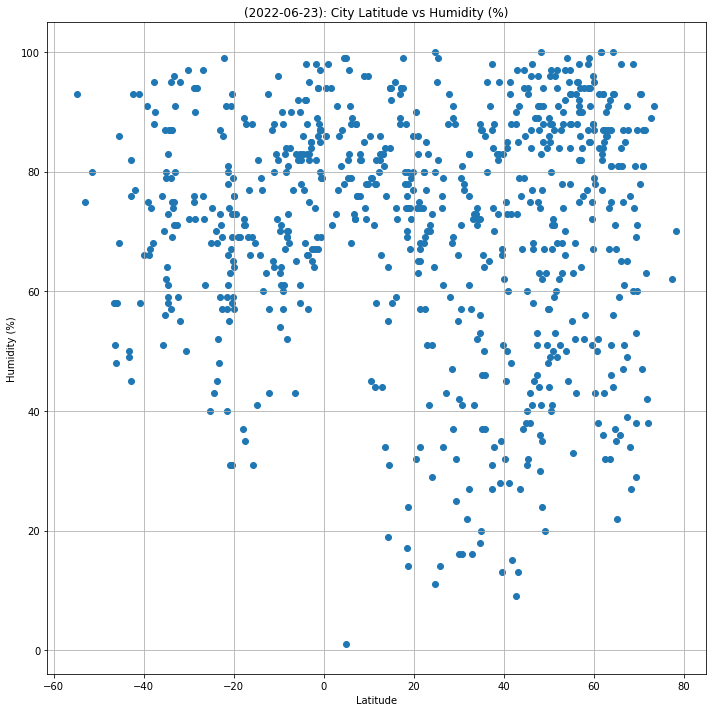

In [6]:
# Latitude vs. Humidity plot
plt.figure(figsize=(10, 10))
plt.grid()
plt.scatter(city_weather['Latitude'],city_weather['Humidity (%)'])
plt.title("(2022-06-23): City Latitude vs Humidity (%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.tight_layout()
plt.show()

In [ ]:
# The scatter plot above expresses the relationship between a city's latitude and its current level of humidity.
# A significant proportion of the oberservations appear to cluster around 60 to 100% humidity.  This might be due to seasonal effects.

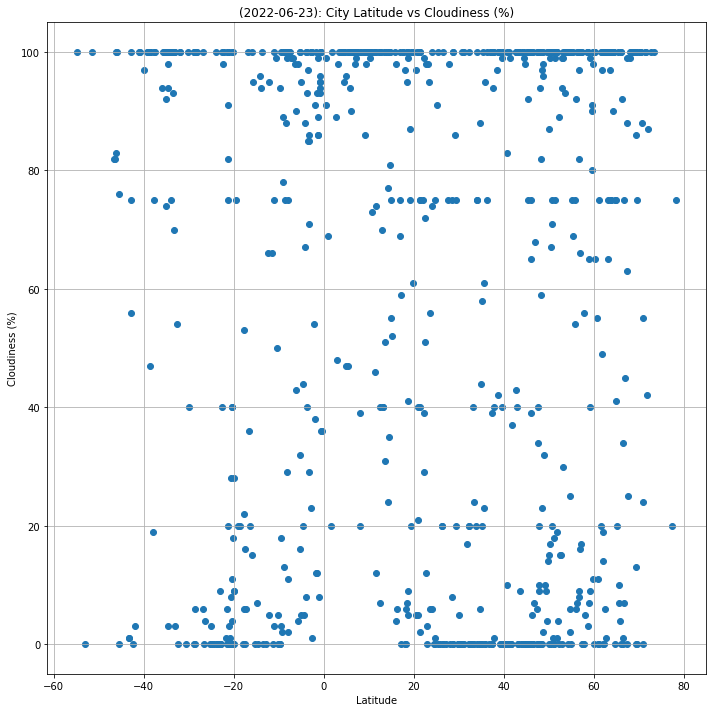

In [7]:
# Latitude vs. Cloudiness plot
plt.figure(figsize=(10, 10))
plt.grid()
plt.scatter(city_weather['Latitude'],city_weather['Cloudiness (%)'])
plt.title("(2022-06-23): City Latitude vs Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.tight_layout()
plt.show()

In [ ]:
# The scatter plot above expresses the relationship between a city's latitude and its current level of cloudiness.
# Cities appear to cluster around 0% cloudiness and 100% cloudiness.

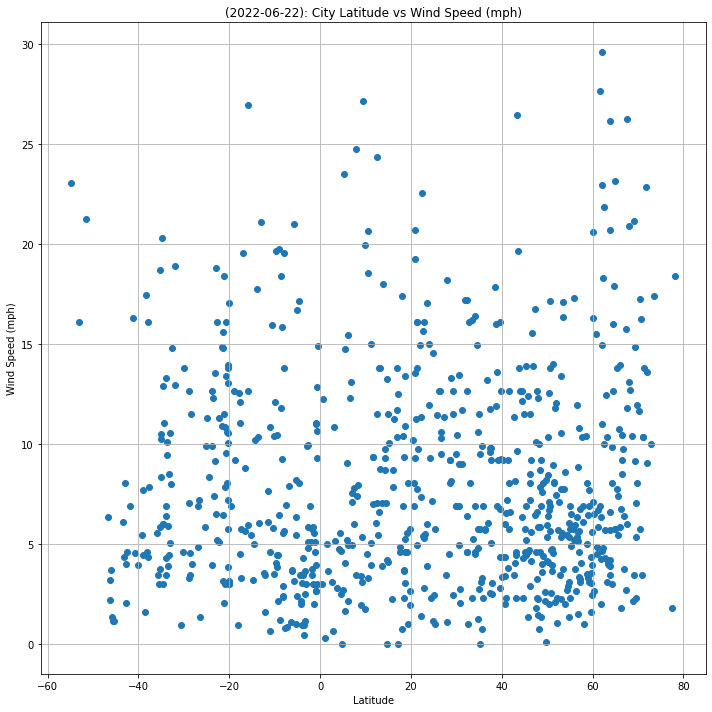

In [8]:
# Latitude vs. Wind Speed plot
plt.figure(figsize=(10, 10))
plt.grid()
plt.scatter(city_weather['Latitude'],city_weather['Wind Speed(mph)'])
plt.title("(2022-06-22): City Latitude vs Wind Speed (mph)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.tight_layout()
plt.show()

In [ ]:
# The scatter plot above expresses the relationship between a city's latitude and its current level of wind speed.
# The wind speed of cities seem to generally fluctuate around lower speed levels.  As wind speed increases observations become fewer. 

In [9]:
# create dataframes for cities in the northern hemisphere and cities in the southern hemisphere

nh_city_weather = city_weather.loc[city_weather['Latitude'] >= 0.0].reset_index(drop=True)
sh_city_weather = city_weather.loc[city_weather['Latitude'] < 0.0].reset_index(drop=True)

In [10]:
# Calculate a linear regression for max temperature and latitude for cities in the Northern Hemisphere

nh_latitude = pd.Series(nh_city_weather["Latitude"])
nh_maxtemp = pd.Series(nh_city_weather["Max Temperature (F)"])

(slope1, intercept1, rvalue1, pvalue1, stderr1) = sts.linregress(nh_latitude, nh_maxtemp)
lobf_1 = slope1 * nh_latitude + intercept1
line_eq_1 = "y = " + str(round(slope1,2)) + "x + " + str(round(intercept1,2))
correl_val1 = sts.pearsonr(nh_latitude, nh_maxtemp)[0]

In [26]:
print('For cities in the Northern Hemisphere:')
print(f'The correlation coefficient between city latitude and maximum temperature is {correl_val1}')

For cities in the Northern Hemisphere:
The correlation coefficient between city latitude and maximum temperature is -0.7024469857235249


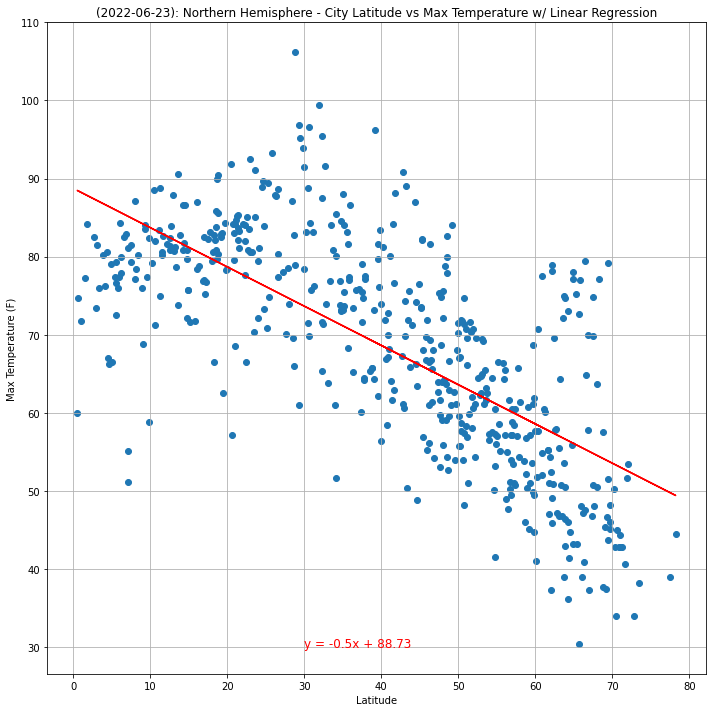

In [13]:
# for cities in the Northern Hemisphere
# Plot linear regression for city latitude vs max temperature in a scatterplot

plt.figure(figsize=(10, 10))
plt.grid()
plt.scatter(nh_city_weather['Latitude'],nh_city_weather['Max Temperature (F)'])
plt.plot(nh_latitude, lobf_1, '-', color="red")
plt.annotate(line_eq_1,(30,30),fontsize=12,color="red")
plt.title("(2022-06-23): Northern Hemisphere - City Latitude vs Max Temperature w/ Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.tight_layout()
plt.show()

In [14]:
# Calculate a linear regression for latitude and max temperature for cities in the Southern Hemisphere

sh_latitude = pd.Series(sh_city_weather["Latitude"])
sh_maxtemp = pd.Series(sh_city_weather["Max Temperature (F)"])

(slope2, intercept2, rvalue2, pvalue2, stderr2) = sts.linregress(sh_latitude, sh_maxtemp)
lobf_2 = slope2 * sh_latitude + intercept2
line_eq_2 = "y = " + str(round(slope2,2)) + "x + " + str(round(intercept2,2))
correl_val2 = sts.pearsonr(sh_latitude, sh_maxtemp)[0]

In [25]:
print('For cities in the Southern Hemisphere:')
print(f'The correlation coefficient between city latitude and max temperature is {correl_val2}')

For cities in the Southern Hemisphere:
The correlation coefficient between city latitude and max temperature is 0.7353822812448515


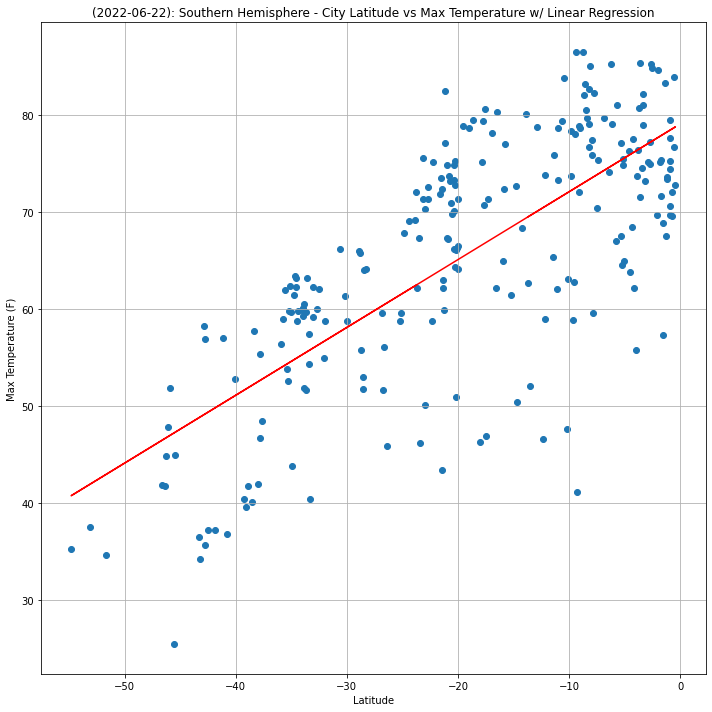

In [20]:
# For cities in the Southern Hemisphere:
# plot linear regression for Latitude and max temperature in a scatterplot

plt.figure(figsize=(10, 10))
plt.grid()
plt.scatter(sh_city_weather['Latitude'],sh_city_weather['Max Temperature (F)'])
plt.plot(sh_latitude, lobf_2, '-', color="red")
plt.annotate(line_eq_2,(-30,20),fontsize=12,color="red")
plt.title("(2022-06-22): Southern Hemisphere - City Latitude vs Max Temperature w/ Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.tight_layout()
plt.show()

In [ ]:
# The regressions above model the relationsip between city latitude and temperature in the northern and southern hemisphere.
# For the former, the relationship is strongly negative, for the latter, strongly positive.  This suggests that the latitudanal range 
# significantly explains the variation in temperature    

In [17]:
# Calculate a linear regression for latitude and humidity for cities in the Northern Hemisphere
nh_humidity = pd.Series(nh_city_weather["Humidity (%)"])

(slope3, intercept3, rvalue3, pvalue3, stderr3) = sts.linregress(nh_latitude, nh_humidity)
lobf_3 = slope3 * nh_latitude + intercept3
line_eq_3 = "y = " + str(round(slope3,2)) + "x + " + str(round(intercept3,2))
correl_val3 = sts.pearsonr(nh_latitude, nh_humidity)[0]

In [23]:
print('For cities in the Northern Hemisphere:')
print(f'The correlation coefficient between city latitude and humidity is {correl_val3}')

For cities in the Northern Hemisphere:
The correlation coefficient between city latitude and humidity is -0.02259258060785457


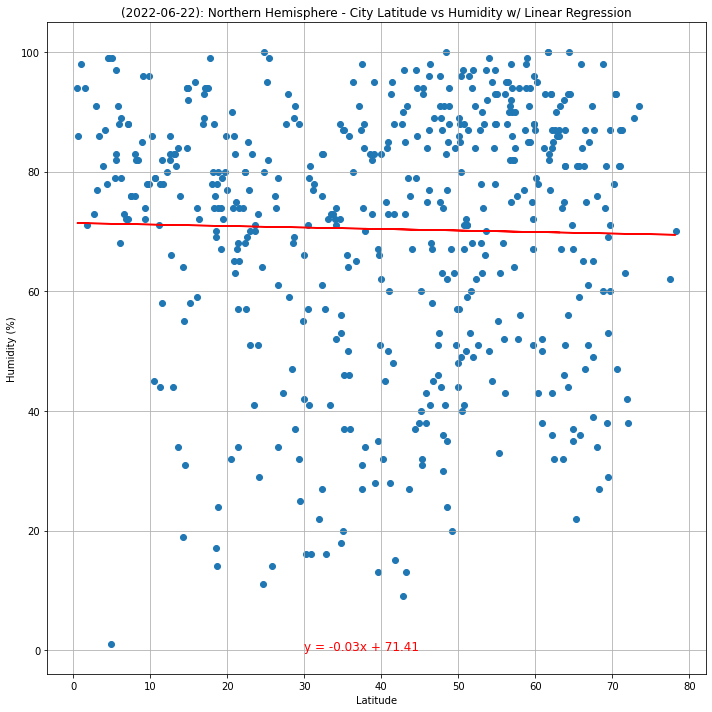

In [42]:
# for cities in the Northern Hemisphere
# Plot linear regression for city latitude vs humidity in a scatterplot

plt.figure(figsize=(10, 10))
plt.grid()
plt.scatter(nh_city_weather['Latitude'],nh_city_weather['Humidity (%)'])
plt.plot(nh_latitude, lobf_3, '-', color="red")
plt.annotate(line_eq_3,(30,0),fontsize=12,color="red")
plt.title("(2022-06-22): Northern Hemisphere - City Latitude vs Humidity w/ Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.tight_layout()
plt.show()

In [22]:
# Calculate a linear regression for latitude and humidity for cities in the Southern Hemisphere
sh_humidity = pd.Series(sh_city_weather["Humidity (%)"])

(slope4, intercept4, rvalue4, pvalue4, stderr4) = sts.linregress(sh_latitude, sh_humidity)
lobf_4 = slope4 * sh_latitude + intercept4
line_eq_4 = "y = " + str(round(slope4,2)) + "x + " + str(round(intercept4,2))
correl_val4 = sts.pearsonr(sh_latitude, sh_humidity)[0]

In [27]:
print('For cities in the Southern Hemisphere:')
print(f'The correlation coefficient between city latitude and humidity is {correl_val4}')

For cities in the Southern Hemisphere:
The correlation coefficient between city latitude and humidity is 0.13761453955853198


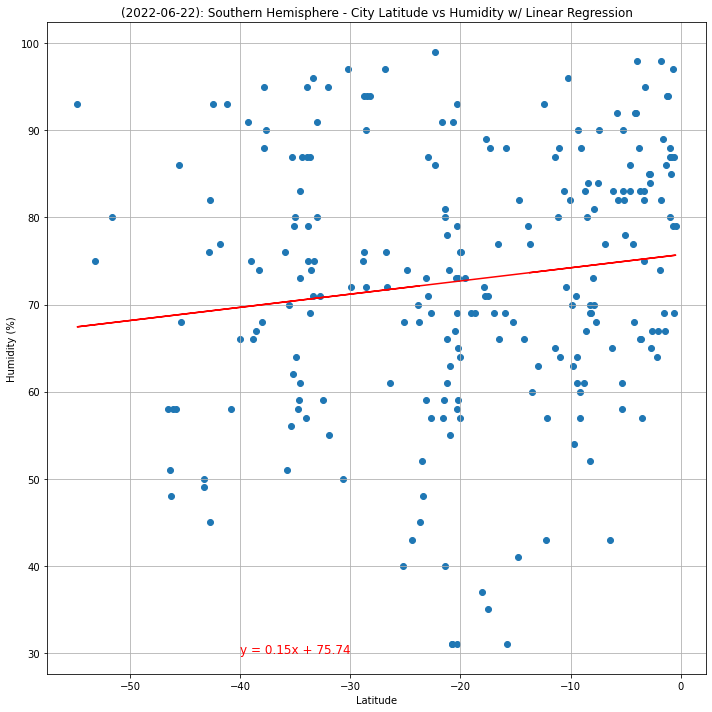

In [43]:
# for cities in the Southern Hemisphere
# Plot linear regression for city latitude vs humidity in a scatterplot

plt.figure(figsize=(10, 10))
plt.grid()
plt.scatter(sh_city_weather['Latitude'],sh_city_weather['Humidity (%)'])
plt.plot(sh_latitude, lobf_4, '-', color="red")
plt.annotate(line_eq_4,(-40,30),fontsize=12,color="red")
plt.title("(2022-06-22): Southern Hemisphere - City Latitude vs Humidity w/ Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.tight_layout()
plt.show()

In [ ]:
# The regressions above model the relationship between city latitude and humidity in the northern and southern hemisphere.
# In both cases the effect size is small suggesting very little relationship between the two variables.  

In [30]:
# Calculate a linear regression for latitude and cloudiness for cities in the Northern Hemisphere
nh_cloudiness = pd.Series(nh_city_weather["Cloudiness (%)"])

(slope5, intercept5, rvalue5, pvalue5, stderr5) = sts.linregress(nh_latitude, nh_cloudiness)
lobf_5 = slope5 * nh_latitude + intercept5
line_eq_5 = "y = " + str(round(slope5,2)) + "x + " + str(round(intercept5,2))
correl_val5 = sts.pearsonr(nh_latitude, nh_cloudiness)[0]

In [31]:
print('For cities in the Northern Hemisphere:')
print(f'The correlation coefficient between city latitude and cloudiness is {correl_val5}')

For cities in the Northern Hemisphere:
The correlation coefficient between city latitude and cloudiness is -0.05861051949542515


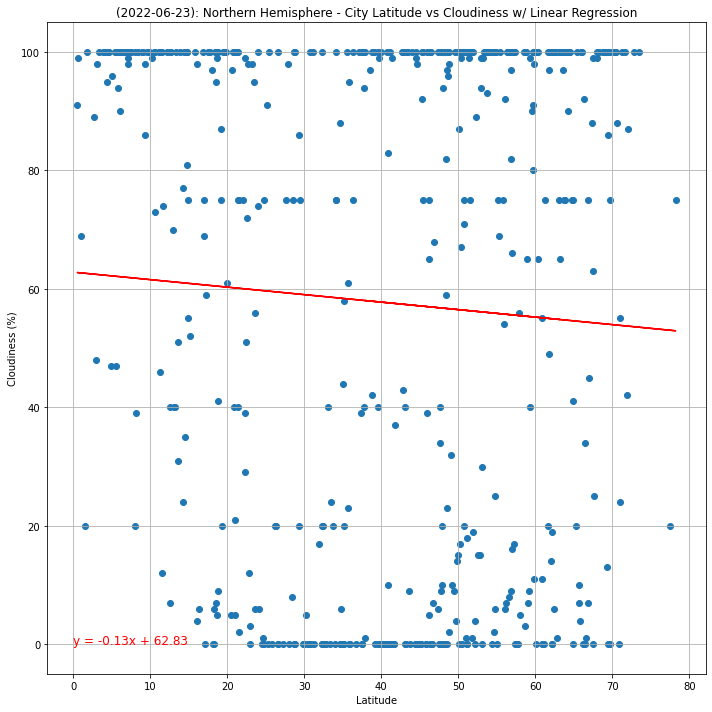

In [44]:
# for cities in the Northern Hemisphere
# Plot linear regression for city latitude vs cloudiness in a scatterplot

plt.figure(figsize=(10, 10))
plt.grid()
plt.scatter(nh_city_weather['Latitude'],nh_city_weather['Cloudiness (%)'])
plt.plot(nh_latitude, lobf_5, '-', color="red")
plt.annotate(line_eq_5,(0,0),fontsize=12,color="red")
plt.title("(2022-06-23): Northern Hemisphere - City Latitude vs Cloudiness w/ Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.tight_layout()
plt.show()

In [34]:
# Calculate a linear regression for latitude and cloudiness for cities in the Southern Hemisphere
sh_cloudiness = pd.Series(sh_city_weather["Cloudiness (%)"])

(slope6, intercept6, rvalue6, pvalue6, stderr6) = sts.linregress(sh_latitude, sh_cloudiness)
lobf_6 = slope6 * sh_latitude + intercept6
line_eq_6 = "y = " + str(round(slope6,2)) + "x + " + str(round(intercept6,2))
correl_val6 = sts.pearsonr(sh_latitude, sh_cloudiness)[0]

In [35]:
print('For cities in the Southern Hemisphere:')
print(f'The correlation coefficient between city latitude and cloudiness is {correl_val6}')

For cities in the Southern Hemisphere:
The correlation coefficient between city latitude and cloudiness is -0.051728422468272355


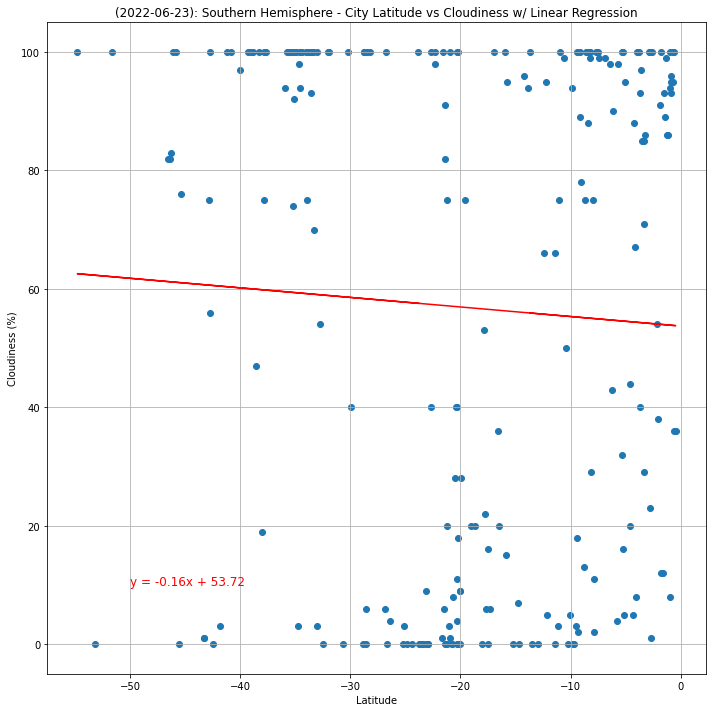

In [53]:
# for cities in the Southern Hemisphere
# Plot linear regression for city latitude vs cloudiness in a scatterplot

plt.figure(figsize=(10, 10))
plt.grid()
plt.scatter(sh_city_weather['Latitude'],sh_city_weather['Cloudiness (%)'])
plt.plot(sh_latitude, lobf_6, '-', color="red")
plt.annotate(line_eq_6,(-50,10),fontsize=12,color="red")
plt.title("(2022-06-23): Southern Hemisphere - City Latitude vs Cloudiness w/ Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.tight_layout()
plt.show()

In [ ]:
# The regressions above model the relationship between city latitude and cloudiness in the northern and southern hemisphere.
# In both cases the effect size is small due to the polarity of observations that lie around 0% and 100%

In [39]:
# Calculate a linear regression for latitude and wind speed for cities in the Northern Hemisphere
nh_windspeed = pd.Series(nh_city_weather["Wind Speed(mph)"])

(slope7, intercept7, rvalue7, pvalue7, stderr7) = sts.linregress(nh_latitude, nh_windspeed)
lobf_7 = slope7 * nh_latitude + intercept7
line_eq_7 = "y = " + str(round(slope7,2)) + "x + " + str(round(intercept7,2))
correl_val7 = sts.pearsonr(nh_latitude, nh_windspeed)[0]

In [40]:
print('For cities in the Northern Hemisphere:')
print(f'The correlation coefficient between city latitude and wind speed is {correl_val7}')

For cities in the Northern Hemisphere:
The correlation coefficient between city latitude and wind speed is 0.034361031446256664


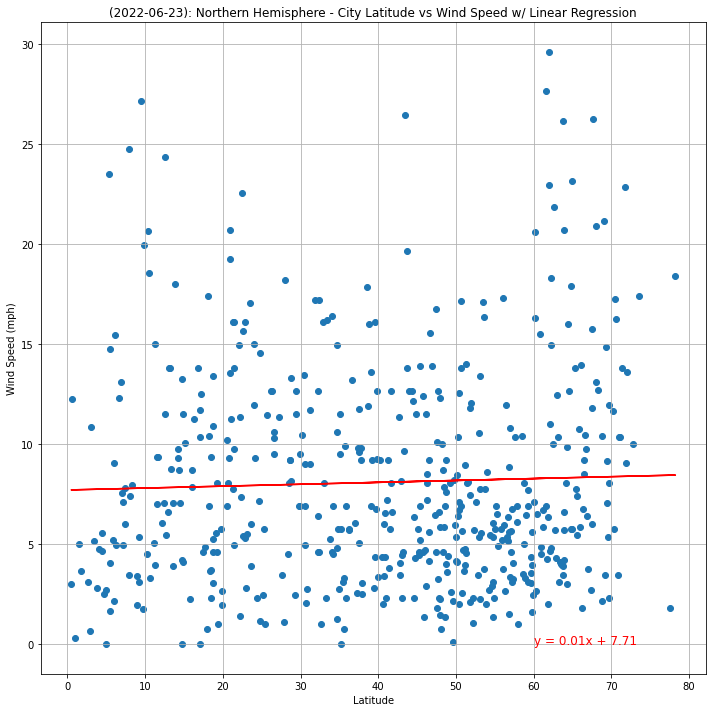

In [50]:
# for cities in the Northern Hemisphere
# Plot linear regression for city latitude vs wind speed in a scatterplot

plt.figure(figsize=(10, 10))
plt.grid()
plt.scatter(nh_city_weather['Latitude'],nh_city_weather['Wind Speed(mph)'])
plt.plot(nh_latitude, lobf_7, '-', color="red")
plt.annotate(line_eq_7,(60,0),fontsize=12,color="red")
plt.title("(2022-06-23): Northern Hemisphere - City Latitude vs Wind Speed w/ Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.tight_layout()
plt.show()

In [48]:
# Calculate a linear regression for latitude and wind speed for cities in the Southern Hemisphere
sh_windspeed = pd.Series(sh_city_weather["Wind Speed(mph)"])

(slope8, intercept8, rvalue8, pvalue8, stderr8) = sts.linregress(sh_latitude, sh_windspeed)
lobf_8 = slope8 * sh_latitude + intercept8
line_eq_8 = "y = " + str(round(slope8,2)) + "x + " + str(round(intercept8,2))
correl_val8 = sts.pearsonr(sh_latitude, sh_windspeed)[0]

In [49]:
print('For cities in the Southern Hemisphere:')
print(f'The correlation coefficient between city latitude and wind speed is {correl_val8}')

For cities in the Southern Hemisphere:
The correlation coefficient between city latitude and wind speed is -0.11528386339766279


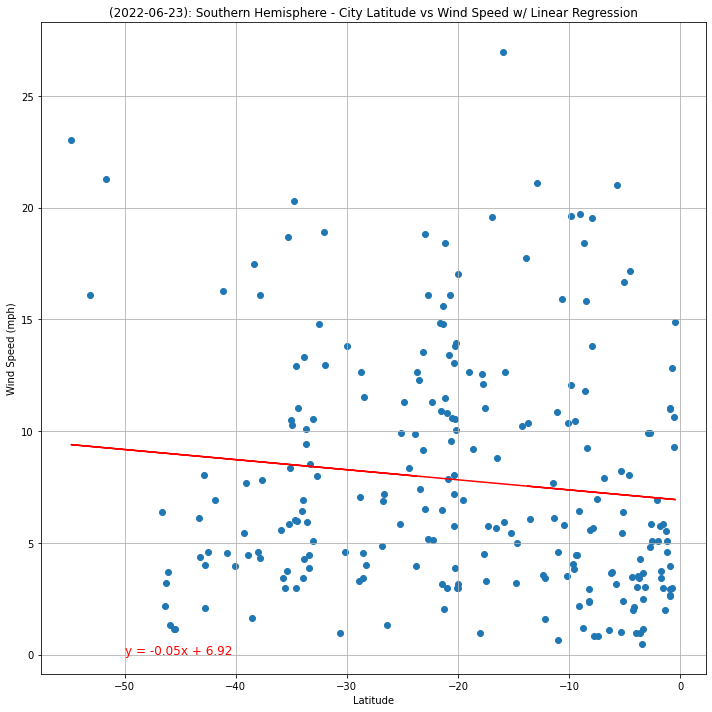

In [55]:
# for cities in the Southern Hemisphere
# Plot linear regression for city latitude windspeed in a scatterplot

plt.figure(figsize=(10, 10))
plt.grid()
plt.scatter(sh_city_weather['Latitude'],sh_city_weather['Wind Speed(mph)'])
plt.plot(sh_latitude, lobf_8, '-', color="red")
plt.annotate(line_eq_8,(-50,0),fontsize=12,color="red")
plt.title("(2022-06-23): Southern Hemisphere - City Latitude vs Wind Speed w/ Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.tight_layout()
plt.show()

In [ ]:
# The regressions above model the relationship between city latitude and windspeed in the northern and southern hemisphere.
# Again, the effect size appears small.  More notable is the degree to which obervations cluster around the line of best fit.